In [ ]:
# install requirements
# !pip install umap-learn 



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Generate random data with two features
# np.random.seed(42)
num_samples = 1000
X1 = np.random.rand(num_samples)  # Random feature 1
X2 = np.random.rand(num_samples)  # Random feature 2

# Define a decision boundary for classification
def generate_labels(X1, X2):
    noise = np.random.rand(len(X1)) * 0.5  # Add some noise
    y = (X1 + X2 + noise > 1.5).astype(int)  # Class 1 if sum of X1, X2, and noise > 1.5, else class 0
    return y

# Generate class labels
y = generate_labels(X1, X2)

# Split data into training and testing sets
X = np.column_stack((X1, X2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.895


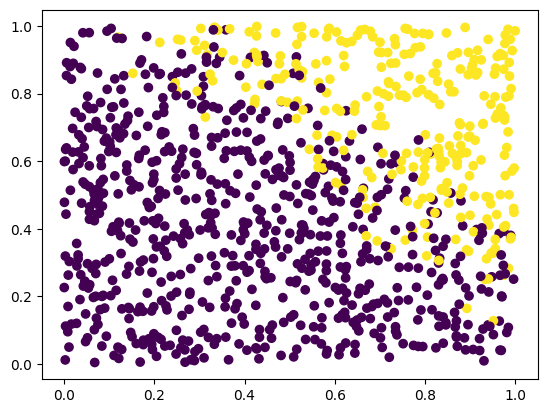

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

503


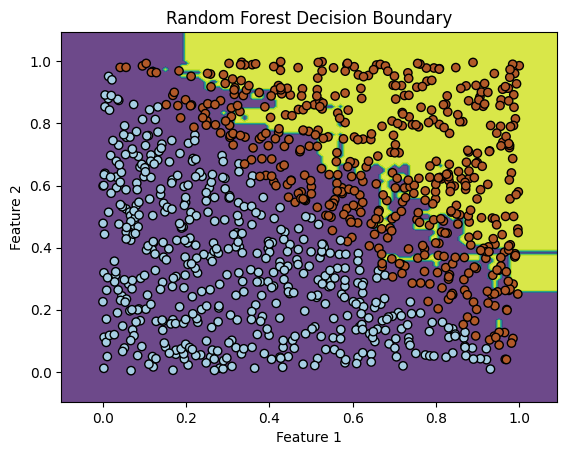

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


def generate_labels(X1, X2):
    noise = np.random.randn(len(X1)) * 0 # Add some noise
    y = (X1 + X2 + noise > 1).astype(int)  # Class 1 if sum of X1, X2, and noise > 1.5, else class 0
    return y

# Generate class labels
y = generate_labels(X1, X2)

print(sum(y))
# Create a mesh grid to plot the decision boundary
x_min, x_max = X1.min() - 0.1, X1.max() + 0.1
y_min, y_max = X2.min() - 0.1, X2.max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X1, X2, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Decision Boundary')
plt.show()

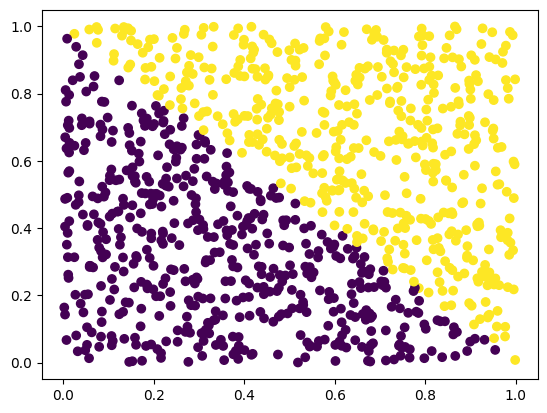

In [ ]:
def generate_labels(X1, X2, noise_list):
    y_gt = (X1 + X2 > 1).astype(int)  # Class 1 if sum of X1, X2, and noise > 1.5, else class 0
    X_gt = np.column_stack((X1, X2))
    X_list = []
    for noise_level in (noise_list):
      noise = np.random.randn(len(X_gt),2) * noise_level  # Add some noise
      X_ = X_gt +noise
      X_list.append(X_)
    return X_gt, X_list,y_gt

num_samples = 1000
X1 = np.random.rand(num_samples)  # Random feature 1
X2 = np.random.rand(num_samples)  # Random feature 2

X, X_list,y = generate_labels(X1, X2, noise_list=[0.5,0.75,1 ,1.5])

plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import rbf_kernel,linear_kernel
from umap import UMAP
def generate_labels(X1, X2, noise_list):
    y_gt = (X1 + X2 > 1).astype(int)  # Class 1 if sum of X1, X2, and noise > 1.5, else class 0
    X_gt = np.column_stack((X1, X2))
    X_list = []
    for noise_level in (noise_list):
      noise = np.random.randn(len(X_gt),2) * noise_level  # Add some noise
      X_ = X_gt +noise
      X_list.append(X_)
    return X_gt, X_list,y_gt

num_samples = 1000
X1 = np.random.rand(num_samples)  # Random feature 1
X2 = np.random.rand(num_samples)  # Random feature 2

X, X_list,y = generate_labels(X1, X2, noise_list=[0.1, 0.25,0.5,1])

X_list = [X] + X_list
K_train_list = []
K_test_list = []

for i in range(len(X_list)):
  X = X_list[i]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Train a Random Forest classifier
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
  rf_classifier.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = rf_classifier.predict(X_test)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy 1:", accuracy)

  print("======")

  K_train = linear_kernel(X_train, X_train)
  K_test = linear_kernel(X_test, X_train)

  # Apply UMAP for data representation learning
  umap = UMAP(n_components=2,n_neighbors=2)
  X_train_umap = umap.fit_transform(K_train)
  X_test_umap = umap.transform(K_test)

  # Train a Random Forest classifier
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
  rf_classifier.fit(X_train_umap, y_train)

  # Make predictions on the test set
  y_pred = rf_classifier.predict(X_test_umap)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy 2 :", accuracy)

  K_train_list.append(K_train)
  K_test_list.append(K_test)


Accuracy 1: 0.965
Accuracy 2 : 0.93
Accuracy 1: 0.89


/usr/local/lib/python3.10/dist-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


Accuracy 2 : 0.845
Accuracy 1: 0.715
Accuracy 2 : 0.725
Accuracy 1: 0.575
Accuracy 2 : 0.485
Accuracy 1: 0.635


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 162 with accuracies 
[2.91519108e-14 3.00024398e-06 1.77623917e-05 3.05233964e-06]
not reaching the requested tolerance 3.829598426818848e-06.
Use iteration 162 instead with accuracy 
5.953743835057649e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[4.67462342e-15 3.00024431e-06 1.77623917e-05 3.05233937e-06]
not reaching the requested tolerance 3.829598426818848e-06.
  _, diffusion_map = lobpcg(


Accuracy 2 : 0.51


In [ ]:
# # Abstract
# In this paper, new method, . to -> bes. Simulation show. Chua dc su dung truoc day, mo ra cach tiep can moi.
# potential,


# Introduction
# Why:
# related work:
# explained: factor
# problem khi ap dung laf gi:  kem hon ket qua, giai thich ket qua.



# # viet tensor

# # thi nghiem
# # simulation
# # combiena


# #

(5, 800, 800)

In [ ]:
K_train_combine = np.empty(K_train.shape)
K_test_combine = np.empty(K_test.shape)

for i in range(len(K_train_list)):
  K_train_combine += K_train_list[i]
  K_test_combine  += K_test_list[i]


In [ ]:
K_train_combine

In [ ]:
# Apply UMAP for data representation learning
umap = UMAP(n_components=2,n_neighbors=15)
X_train_umap = umap.fit_transform(K_train_combine)
X_test_umap = umap.transform(K_test_combine)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_umap, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_umap)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.51


In [ ]:
!pip install tensorly
import numpy as np
import tensorly as tl
from tensorly.decomposition import non_negative_parafac


rank = 5
tensor = tl.tensor(np.array(K_train_list))

# Perform Non-negative CP decomposition
factors = non_negative_parafac(tensor, rank=rank)

# Factors contain the factor matrices
for i, factor in enumerate(factors):
    print(f"Factor {i+1}:")
    print(factor)

# Reconstruct the tensor from the factors
reconstructed_tensor = tl.kruskal_to_tensor(factors)

# Calculate the reconstruction error
reconstruction_error = tl.norm(tensor - reconstructed_tensor) / tl.norm(tensor)
print(f"Reconstruction error: {reconstruction_error}")


Factor 1:
[1. 1. 1. 1. 1.]
Factor 2:
[array([[1.01726038e-02, 5.85445571e-02, 1.68748632e-01, 7.85826753e-03,
        2.26020786e-02],
       [6.54778705e-03, 3.94721892e-02, 1.83727234e-01, 1.42671873e-03,
        2.47318275e-02],
       [2.44555376e-03, 1.42723441e-02, 8.00716349e-02, 1.19054588e-01,
        2.38695300e-03],
       [8.21449502e-05, 9.59804619e-01, 1.14530041e-04, 4.24608292e-06,
        3.71855889e-04],
       [8.27252496e-01, 4.13429377e-16, 4.69380517e-19, 3.84187571e-19,
        9.30091602e-18]]), array([[8.92326076e-01, 5.49086223e-01, 1.14347897e+00, 1.27966600e+00,
        4.25595142e+00],
       [0.00000000e+00, 7.77308468e-01, 4.90718642e-01, 4.68428454e+00,
        5.83389229e+00],
       [3.20063850e+00, 4.57432499e-02, 2.91985201e-01, 2.06726349e+00,
        4.99130996e+00],
       ...,
       [1.53971633e+00, 0.00000000e+00, 2.02887462e+00, 1.69799589e+00,
        2.79751296e-05],
       [0.00000000e+00, 4.09414480e-26, 3.42346241e-01, 1.46018016e+00,
   

In [ ]:
rank_1_tensors = [ np.outer(factors.factors[1][:, i], factors.factors[2][:, i]) for i in range(rank)]
rank_1_tensors[0].shape

(800, 800)

In [ ]:
# Combine kernel

# Tensor decomposition => splitting group

# tensor vs other method?

# add constrain?

# Comparing all vs splitting

#Result 1

# Feature selction / filtering features?

Accuracy: 0.50125


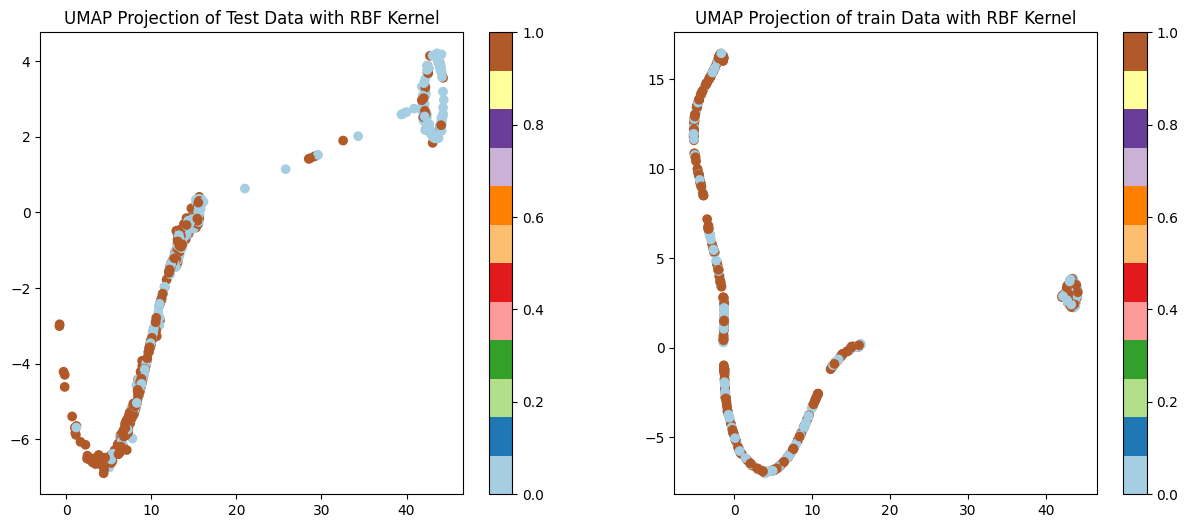

In [ ]:

# Calculate RBF kernel matrix
# gamma = 1.00000010  # Gamma parameter for RBF kernel
# K_train = rbf_kernel(X_train, X_train, gamma=gamma)
# K_test = rbf_kernel(X_test, X_train, gamma=gamma)

# K_train = linear_kernel(X_train, X_train)
# K_test = linear_kernel(X_test, X_train)

# Apply UMAP for data representation learning
umap = UMAP(n_components=2,n_neighbors=50)
X_train_umap = umap.fit_transform(rank_1_tensors[0])
X_test_umap = umap.transform(rank_1_tensors[1])

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_umap, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_umap)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('UMAP Projection of Test Data with RBF Kernel')
plt.colorbar()
plt.subplot(122)
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('UMAP Projection of train Data with RBF Kernel')
plt.colorbar()
plt.show()
# Accuracy: 0.695 0.1
# Accuracy: 0.705 0.001
# Accuracy: 0.715 0.000010
# Accuracy: 0.695 00000010
# Accuracy: 0.695 1




In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=f750363eb6cb15d22721923ed672cd8ab2be85929c95227fed6857eb775e434c
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import rbf_kernel,linear_kernel
from umap import UMAP
# Calculate RBF kernel matrix
gamma = 1.00000010  # Gamma parameter for RBF kernel
K_train = rbf_kernel(X_train, X_train, gamma=gamma)
K_test = rbf_kernel(X_test, X_train, gamma=gamma)

# K_train = linear_kernel(X_train, X_train)
# K_test = linear_kernel(X_test, X_train)

# Apply UMAP for data representation learning
umap = UMAP(n_components=2,n_neighbors=50)
X_train_umap = umap.fit_transform(K_train)
X_test_umap = umap.transform(K_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_umap, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_umap)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('UMAP Projection of Test Data with RBF Kernel')
plt.colorbar()
plt.subplot(122)
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('UMAP Projection of Test Data with RBF Kernel')
plt.colorbar()
plt.show()
# Accuracy: 0.695 0.1
# Accuracy: 0.705 0.001
# Accuracy: 0.715 0.000010
# Accuracy: 0.695 00000010
# Accuracy: 0.695 1




In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title('UMAP Projection of Test Data with RBF Kernel')
plt.colorbar()
plt.subplot(122)
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('UMAP Projection of Test Data with RBF Kernel')
plt.colorbar()
plt.show()

In [ ]:
K_train.shape, K_test.shape

In [ ]:
help(umap)